# Artificial Intelligence :  Computer Assignment 3 - Naive Bayes Classifier
> __Morteza Nouri, 810198481__

## Goals:
- Usage of Naive Bayes theorem
- analyzing and classifying text
- 

## Description:
> 


## Part 1: Preprocess
In this part I use [hazm library](https://www.roshan-ai.ir/hazm/) to process persian text in dataset. At first I remove all useless words(stopwords and punctuations) in the data then processing text using methods below:<br>
- __Normalization:__ normalize and adjust spaces.
- __Steamming:__ remove prefix and postfix of a word to find it's root.
- __Lemmatization__: except removing postfix and prefix of word, it will verify that root to be correct in meaning.
 
 __Q1__: In our text we might see a word in different forms(e.g. Plural, singular), but they are from same root and can have same effect in our classification. According to methods mentiond above, I decide to use Normalization and Lemmatization. Lemmatization gives us __Bon-e-Maazi__ and __Bon-e-Mozare__ of a verb in persian language and two words which have same root, in most cases have same concept.<br>
 _Note: Steaming is not accurate, because in some cases it destructs the normal form of the word. So I prefer to use Lemmatization instead that gives better perfomance and reduces the count of words in our bag._


In [1]:
from __future__ import unicode_literals
from hazm import *
import pandas as pd


class DataPreprocessor:
    normalizer = Normalizer()
    lemmatizer = Lemmatizer()
    tokenizer = WordTokenizer()
    useless_words = set(stopwords_list() + ['.', '،', '؛', '[', ']', '{', '}', '(', ')', '?', '!', ':', ';', '\"', '\'', '*', '/', '+',
       '%', '#', '@','-', '_', '\r\n', '\n', '«', '»', '>', '<', '=', '۹', '۸', '۷', '۶', '۵', '۴', '۳', '۲', '۱','.', '...', ])
    
    def __init__(self, dataset):
        self.dataset = dataset
    
    def preprocess(self):
        for i in range(len(self.dataset)):
            self.dataset['content'][i] = self.__preprocess_util(self.dataset['content'][i])
        return self.dataset
    
    def __preprocess_util(self, text):
        text = self.normalizer.normalize(text)
        text = self.tokenizer.tokenize(text)
        words = [self.lemmatizer.lemmatize(word) for word in text if not (word in self.useless_words)]
        return words

In [2]:
train_data = pd.read_csv('Data/train.csv')
train_data['content'].fillna(train_data['label'], inplace=True)

data_preprocessor = DataPreprocessor(train_data)
clean_train_df = data_preprocessor.preprocess()
clean_train_df

,content,label
0,"[فیلم, اکران, موزیکال, شاد, خاله, قورباغه, بزر...",هنر و سینما
1,"[فیلمسازی, کوئنتین, تارانتینو, عاشق, سینما, کم...",هنر و سینما
2,"[جان, آیو, اپل, جان, آیو, نیاز, معرف, تقریبا, ...",علم و تکنولوژی
3,"[احتمال, پشتیبان, iOS, ۱۳, آیفون, اس, SE, آیفو...",علم و تکنولوژی
4,"[دزد, مغازه, نماینده, ژاپن, اسکار, ۲۰۱۹, فیلم,...",هنر و سینما
...,...,...
5195,"[امپراطوری, اپ, فصل, اول/بخش, فصل, –, دوماپ, ,...",سلامت و زیبایی
5196,"[ارتباطات, اثربخش, تعارض, محیط, کار, سازمان, و...",سلامت و زیبایی
5197,"[اپل, سال, ۲۰۲۰, آیفون, معرف, گزارش, JPMorgan,...",علم و تکنولوژی
5198,"[مارتینز, بلژیک, مقابل, فرانسه, ترس, بازی, سرم...",سلامت و زیبایی


In [3]:
clean_train_df['label'].value_counts()

هنر و سینما       1300
علم و تکنولوژی    1300
سلامت و زیبایی    1300
بازی ویدیویی      1300
Name: label, dtype: int64

## Part 2: Process
We use bag of words method for magazine content to count words related to category. <br>

__Q2:__ 
- $c$: Magazine category. 
- Evidence $x$: Number of appearences of word. by seeing evidence we want to calculate posterior probability.
- Likelihood $p(x|c)$: Probability of having evidence in category c. This probability computed by means of given dataset.
- Prior $p(c)$: Probability of seeing magazine with category $c$.It is equal for all categories since they all have occured the same number of times in the dataset.(see above)
- Posterior $p(c|x)$ : Probability of belonging magazine to $c$ which results in the word $x$ has appeared in the magazine.We use this probability to classify.

In [4]:
science_tec = dict()
art_cinema = dict()
game = dict()
health_beauty = dict()
for idx, row in clean_train_df.iterrows():
    for word in row['content']:
        if row['label'] == 'علم و تکنولوژی':
            science_tec[word] = science_tec.get(word, 0) + 1
        if row['label'] == 'هنر و سینما':
            art_cinema[word] = art_cinema.get(word, 0) + 1
        if row['label'] == 'بازی ویدیویی':
            game[word] = game.get(word, 0) + 1
        if row['label'] == 'سلامت و زیبایی':
            health_beauty[word] = health_beauty.get(word, 0) + 1


## Part 3: Bigrams
__Q3:__ 
- شیر سلطان جنگل است
- شیر سرشار از کلسیم است

In the above sentences, by using unigram, we can not distinguish 'شیر' meanings. If we use bigrams the different meanings of the 'شیر' can be distinguished properly.(maybe using bigrams in second sentence cause ambiguity thus 3-grams is better choice!) 

## Part 4: ‫‪Additive‬‬ ‫‪Smoothing‬‬
__Q4:__ If word w in our test dataset was not appeared in content of category c, probability of belonging to that category would be zero, So the likelihood will be zero and according to the $p(x_1|c)*p(x_2|c)*...*p(x_n|c)$ in Naive Bayes theorem, $p(c|x) = 0$.<br>

__Q5:__ 
$$ P_\alpha(x_i | c) = \frac {x_i + \alpha}{N + \alpha D} $$
where :
- $P_\alpha(x_i | c)$ is additive smoothed probability of evidence $x_i$ in category c.
- $x_i$ is number of all appearences of a word in category c.
- $\alpha$ is additive smoothing.
- $N$ is total number of words in category c.
- $D$ is number of distinct words in category c.

_Note:_ By assuming $\alpha = 0$ may get $p(x_i|c) = 0$, but with $\alpha > 0$ we guarantee that $ p(x_i|c) > 0$.

## Verifying Correctness
__Q6:__ We know that if we have words which they are frequent in all categories, these words cann't be usefull for prediction. Our task is to remove these words for domain.


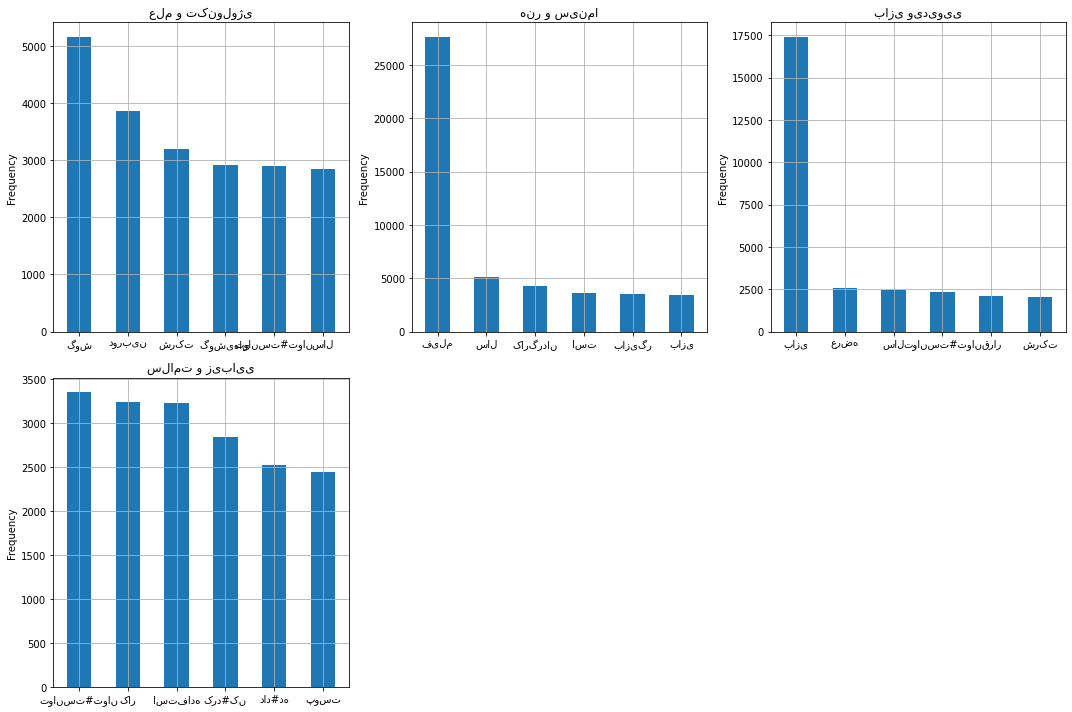

In [5]:
import matplotlib.pyplot as plot

categories = {'علم و تکنولوژی':science_tec, 'هنر و سینما':art_cinema, 'بازی ویدیویی':game, 'سلامت و زیبایی':health_beauty}

plot.figure(figsize=(15,10))
i = 0
for c, f  in categories.items():
    plot.subplot(2, 3, i + 1)
    sorted_freq = sorted(f.items(), key=lambda x: x[1], reverse=True)
    x = []
    y = []
    for item in sorted_freq[0:6]:
        x.append(item[0])
        y.append(item[1])
    plot.bar(x, y, width=0.5)
    plot.ylabel('Frequency')
    plot.title(c)
    plot.grid()
    i += 1
plot.tight_layout()
plot.show()